# Data Science Project (ramen-ratings.csv)
INFO 1998 Fall 2020
<br>
<br>
Completed: October 30, 2020 
<br>
Members: Emma Wang (yw345), Seungmin Lee (sl2324), Lydia Kim (lmk225)




## Preprocessing and Manipulation

Dataset: https://www.kaggle.com/residentmario/ramen-ratings

Question: What are the common ratings of ramen? What are the ratings of the most popular ramen?
_____

In [1]:
# import libraries
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import ramen dataset
df=pd.read_csv('ramen-ratings.csv')

In [3]:
# delete 'Top Ten' column
# citation: https://stackoverflow.com/questions/28035839/how-to-delete-a-column-from-a-data-frame-with-pandas
del df['Top Ten']

# check the columns in dataframe
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

In [4]:
# see first 5 rows of dataframe df
df.head(5) 

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


## Visualizations

### Visualization 1: Bar Graph

In [5]:
# clean up dataframe and store into ramen_data
ramen_data = df.loc[df['Stars'] != 'Unrated']
ramen_data = ramen_data.astype({"Stars": float})

dict={}
counter=0
# create dictionary dict with key : brand, value : ratings
for i in ramen_data['Brand']:
    if(i in dict):
        x=ramen_data.iloc[counter]['Stars']
        x=float(x)
        dict[i].append(x)
    else:
        x=ramen_data.iloc[counter]['Stars']
        x=float(x)
        dict[i]=[x]
    counter=counter+1

# create dictionary dict2 with key : brand, value : average rating
dict2={}
for i in dict:
    y=np.array(dict[i])
    average=y.mean()
    dict2[i]=[average]

# create dictionary dict3 for ratings of (4.0, 5.0]
dict3 ={}
for i in dict2:
    if(dict2[i][0]<=5 and dict2[i][0]>4):
        dict3[i]=dict2[i]
        
# create dictionary dict4 for ratings of (3.0, 4.0]      
dict4={}
for i in dict2:
    if(dict2[i][0]<=4 and dict2[i][0]>3):
        dict4[i]=dict2[i]
        
# create dictionary dict5 for ratings of (2.0, 3.0]        
dict5={}
for i in dict2:
    if(dict2[i][0]<=3 and dict2[i][0]>2):
        dict5[i]=dict2[i]
        
# create dictionary dict6 for ratings of (1.0, 2.0] 
dict6={}
for i in dict2:
    if(dict2[i][0]<=2 and dict2[i][0]>1):
        dict6[i]=dict2[i]

# create dictionary dict7 for ratings of [0.0, 1.0] 
dict7={}
for i in dict2:
    if(dict2[i][0]<=1 and dict2[i][0]>=0):
        dict7[i]=dict2[i]

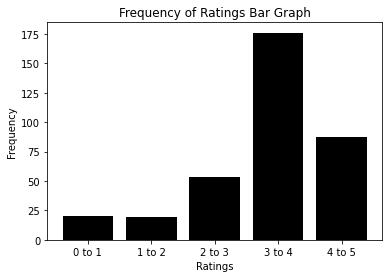

In [6]:
# create bar graph categories
fourFive=len(dict3)
threeFour=len(dict4)
twoThree=len(dict5)
oneTwo=len(dict6)
zeroOne=len(dict7)

# create and show bar graph
plt.bar([0,1,2,3,4],[zeroOne,oneTwo,twoThree,threeFour,fourFive],align='center',color='black') 

plt.title('Frequency of Ratings Bar Graph')
plt.xticks([0,1,2,3,4],['0 to 1','1 to 2','2 to 3','3 to 4','4 to 5'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

### Visualization 2: Box Plot

['Nissin', 'Nongshim', 'Paldo', 'Maruchan', 'Mama']


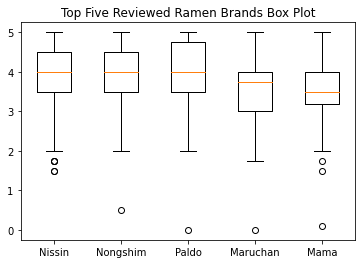

In [7]:
# create and print list of top 5 reviewed brands
x=[]
for i in dict:
    if(len(dict[i]) >65):
        x.append(i)       
print(x)

# create and show box plot of top 5 reviewed brands
ramenBox=plt.boxplot([dict['Nissin'],dict['Nongshim'],dict['Paldo'],dict['Maruchan'],dict['Mama']])

plt.title('Top Five Reviewed Ramen Brands Box Plot')
plt.xticks([1,2,3,4,5],['Nissin','Nongshim','Paldo','Maruchan','Mama'])

plt.show()

## Write-Up

As stated above, the questions that we wanted to answer were: What are the common ratings of ramen? What are the ratings of the most popular ramen?

### Visualization 1: Bar Graph

To answer the first question, our group created a bar graph that portrayed the frequency of ramen ratings. As each ramen review was based on a scale of 0 to 5, we separated the ratings into five ordinal categories: 0 to 1, 1 to 2, 2 go 3, 3 to 4, and 4 to 5. The frequency of each category was plotted as a bar in the bar graph. Based on the visualization, we are able to infer that the most common rating for the ramen reviews are between 3 and 4 because its bar had the highest frequency of 176 reviews. Ratings between 4 and 5 stars came in second with 87 reviews, followed by ratings between 2 and 3 stars, ratings between 0 and 1 stars, and ratings between 1 and 2 stars. As the majority of ramen reviews had ratings above 3 stars, we can infer that most people who reviewed the ramen found their food to be satisfactory, as it is generally accepted that a rating of 3.0+ means that the food has been acceptable or better.

### Visualization 2: Box Plot

To answer the second question, our group created a box plot of the top 5 reviewed ramen brands. We chose to create a box plot with the top 5 reviewed ramen brands because as there are more reviews, this means that each dataset is more representative of the reviewers and minimizes the skew of data due to extremely high or extremely low ratings. We identified the top 5 reviewed ramen brands to be: Nissin, Nongshim, Paldo, Maruchan, and Mama. By creating these box plots, we could visualize the spread of these ramen brands. Based on the visualization, we were able to identify the median ratings of these brands: Nissin - 4.0, Nongshim - 4.0, Paldo - 4.0, Maruchan - 3.75, and Mama - 3.5. As the median ratings of Nissin, Nongshim, and Paldo are higher than those of Maruchan and Mama, this tells us that the distribution of their ratings include higher ratings. 

Through the visualization, we are able to see that Mama has three outliers, or three reviews that are greater than 1.5 times the interquartile range. We can infer that because of these three outliers, the distribution of Mama's dataset could have been skewed to have a lower median rating. It is important to note that all top 5 reviewed ramen brands have at least one outlier in their dataset, as seen with the open circles above. In addition, although Nissin, Nongshim, and Paldo have the same median rating, their box plots look different. While Nissin and Nongshim's box plot look similar with the difference that Nissin has 2 outliers whereas Nongshim has 1 outlier, Paldo's box visualization differs greatly. Paldo's third quartile range is larger and maximum (fourth quartile) range is smaller than those of Nissin and Nongshim. This tells us that Paldo has more higher ratings as the maximum range is smaller and is associated with 25% of the ratings.

From the box plot, we can infer that the top 5 reviewed ramen brands generally had good ratings as their median ratings have all been 3.5+. However, they also had some negative reviews as each brand had at least one outlier that was below 1.5 times the interquartile range.